## About the notebook
---

In this notebook, you will learn how to train simple neural net to predict class of given grayscale images using `Keras`.

## Data engineering (feel free to skip)
---

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

### Plotting (helper functions - no need to understand)

In [2]:
def dis_img(x,y, title = None):
    """
    Plots randomly selected set of images
    into 4 x 4 grid. 
    """
    np.random.seed(213)
    indx = np.random.choice(range(x.shape[0]) , 16 )   
    fig, ax = plt.subplots(4, 4,
                           figsize=(5,5),
                           subplot_kw={'xticks': [], 'yticks': []})      
    imag = [ (x[ind],y[ind])  for ind in indx] 
    for coef, ax in zip(imag, ax.ravel()):
        ax.imshow(coef[0].reshape(28, 28), cmap=plt.cm.gray)     
        ax.set_title(str(coef[1]))
        fig.tight_layout()
    plt.show()

def dis_img_fx(x,y):
    """
    Plots row of input images and corresponding
    predicted labels.
    """
    fig, ax = plt.subplots(1, x.shape[0],
                               figsize=(5,5),
                               subplot_kw={'xticks': [], 'yticks': []})      
    indx = np.arange(x.shape[0])
    imag = [ (x[ind],y[ind])  for ind in indx] 
    for coef, ax in zip(imag, ax.ravel()):
        ax.imshow(coef[0].reshape(28, 28), cmap=plt.cm.gray)     
        ax.set_title(str(coef[1]))
        fig.tight_layout()
    plt.show()

### Load data and do train-test split

In [3]:
# Load data from the via Keras API
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Select subset of data with given two labels
Y1 = 1
Y2 = 7

# - train
x_train = x_train[np.where((y_train == Y1) | (y_train == Y2))]
y_train_m = y_train[np.where((y_train == Y1) | (y_train == Y2))]

# - test
x_test = x_test[np.where((y_test == Y1) | (y_test == Y2))]
y_test_m = y_test[np.where((y_test == Y1) | (y_test == Y2))]

### Simple data preprocessing

In [4]:
# x_train has shape (n, 28, 28), but we want it to be 2D
# therefore we flatten it such that x_train is (n, 28*28) = (n, 784)
# In addition, since each pixel is between 0 - 255, we normalize it by / 255
x_train = x_train.reshape(-1, 784).astype('float32') /255.
x_test = x_test.reshape(-1, 784).astype('float32') /255.

# Turn the labels to binary instead of 1 and 7
y_train = tf.where(y_train_m==Y1, 1, 0)
y_test = tf.where(y_test_m==Y1, 1, 0)

### Basic input data info

Training data shape: (13007, 784)
Test data shape: (2163, 784)
Sample of the training images: 


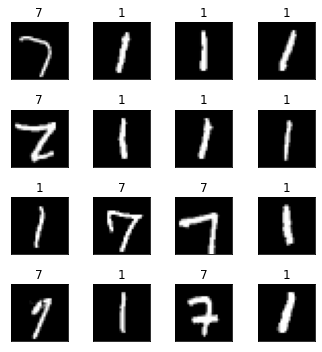

In [5]:
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print("Sample of the training images: ")
dis_img(x_train, y_train_m, 'random_samples')

## ANN training using Keras (important part of the tutorial)

---
* We can use [Sequential model](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) which is the simplest kind of Keras models for neural networks that are just composed of a single stack of layers connected sequentially. 
* We can define Dense to get [Fully connected layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
    

### Define model's architecture, loss function and optimizer

In [6]:
# Architecture
classifier = tf.keras.Sequential(name='mnist_17')
classifier.add(tf.keras.Input(shape=(784,)))
classifier.add(tf.keras.layers.Dense(10, activation='relu'))
classifier.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Loss, optimizer
classifier.compile(loss='binary_crossentropy',
                   optimizer= tf.keras.optimizers.SGD(learning_rate=0.01), 
                   metrics=['accuracy'])

# Show overview of the ANN
classifier.summary()

Model: "mnist_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 7,861
Trainable params: 7,861
Non-trainable params: 0
_________________________________________________________________


### Training

In [7]:
history = classifier.fit(x_train, y_train, epochs=150, batch_size=x_train.shape[0], verbose=0)
print('Loss: ', history.history['loss'][-1],'| Acc: ', history.history['accuracy'][-1] )

Loss:  0.18385018408298492 | Acc:  0.9831629395484924


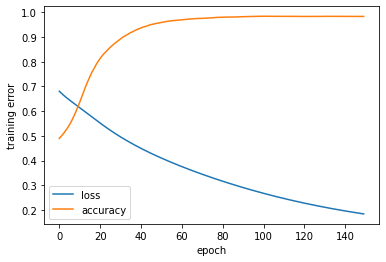

In [8]:
# Training history
plt.figure()
plt.ylabel('training error')
plt.xlabel('epoch')
for k in history.history.keys():
    plt.plot(history.history[k], label = k);
plt.legend(loc='best');

### Visualize how well the model got trained

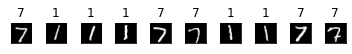

In [10]:
# Select first 10 images in test data
X_new = x_test[:10]
Y_new = y_test[:10]

# Make prediction
y_pred = classifier.predict(X_new)

# Decide based on returned probabilities
y_pred = (y_pred.flatten() < 0.5)*Y2 + (y_pred.flatten() >= 0.5)* Y1
y_pred = y_pred.tolist() 

# Show the images with predicted labels
dis_img_fx(X_new, y_pred);

---